In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
data, labels = iris['data'], iris['target']
data.shape

(150, 4)

In [9]:
import numpy as np
X = iris["data"][:, 3:] # petal width`
y = (iris["target"] == 2).astype(np.int)

# Adding polynomial feature

In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

num_pipe = Pipeline([("scaling", StandardScaler()),
                        ("poly", PolynomialFeatures(degree=3))
                    ])
X_imp = num_pipe.fit_transform(X)

# Trying Linear Support Vector Classification

In [12]:
from sklearn.svm import SVC

svc = SVC(kernel="linear")

svc.fit(X,y)

print(svc.predict(X[100].reshape(1,-1)))
print(y[100])

[1]
1


In [16]:
# Cross validation(without scaling)
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(svc, X, y, cv=3, scoring="accuracy")
print(scores.mean())

0.9459863945578232


In [17]:
# Cross validation(with scaling and adding polynomial feature)
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(svc, X_imp, y, cv=3, scoring="accuracy")
print(scores.mean())

0.959591836734694


# Trying Stochastic Gradient Descent Classifier

In [27]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="hinge")

scores_sgd = cross_val_score(sgd, X_imp, y, cv=3, scoring="accuracy")
print(scores_sgd.mean())

0.9138402027477658


/home/avnish/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/avnish/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/avnish/ana

# Trying Radial Basis Function

In [20]:
rbf = SVC(kernel="rbf", gamma=5, C=0.001)

scores_rbf = cross_val_score(rbf, X_imp, y, cv=3, scoring="accuracy")
scores_rbf.mean()

0.6667120181405896

# Support Vector Regression
SVM Regression tries to fit as many instances as possible on the street while limiting margin
violations (i.e., instances off the street).

# Fitting a logistic regression model

In [13]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit = logit.fit(X,y)


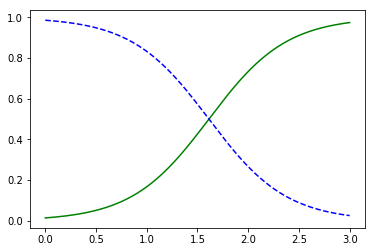

In [16]:
import matplotlib.pyplot as plt
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = logit.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [17]:
X = iris["data"][:, (2, 3)]
y = iris["target"]
# petal length, petal width
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
softmax_reg.predict([[5, 2]])

array([2])

# What is fundamental idea behind Support Vector Machine?  

Support Vector Machine makes a decision boundry or function such that it classifies data into two classes using support vectors.  

# What is a Support Vector?  

The instances on the edge of street to which decision boundry is equidistant.  

#  Why is it important to scale the inputs while using SVM?  

SVM is sensetive to scaling.  

# Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?  

No, it outputs the class of instance passed.  

# Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?  

No, we should use kernels instead as they are more efficient.  

# Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set should you increase or decrease γ ( gamma )? What about C ?  

We should increase gamma and C.  
